#**Analyzing Mental of Students**



# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preprocessing Data

## Load dan Cek Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## Cek Nilai Unik dan Missing Values

In [ ]:
for col in df.columns:
    unique_values = df[col].dropna().unique()
    print(f"Kolom: {col}")
    print(unique_values)
    print("-" * 50)

df.isnull().sum()

Kolom: id
[     2      8     26 ... 140689 140690 140699]
--------------------------------------------------
Kolom: Gender
['Male' 'Female']
--------------------------------------------------
Kolom: Age
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
--------------------------------------------------
Kolom: City
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
--------------------------------------------------
Kolom: Profession
['Student

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


- Melakukan iterasi pada setiap kolom untuk melihat nilai unik.

- Mengecek jumlah nilai yang hilang (missing values) di setiap kolom dan tidak terdapat missing value pada data ini.



## Membersihkan Data

In [ ]:
df_clean = df.drop(columns=["id"])

Menghapus kolom id karena tidak relevan untuk analisis.

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

- Mengambil semua kolom yang bertipe kategori (string/object).

- Membersihkan nilai dari spasi yang tidak perlu (strip()).

In [ ]:
df.drop_duplicates(inplace=True)

Menghapus data yang duplikat agar tidak memengaruhi analisis.



## Mengubah 'Sleep Duration' Menjadi Numerik

In [ ]:
df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.strip().str.replace("'", "")

def convert_sleep_duration(sleep_str):
    mapping = {
        'Less than 5 hours': 4.5,
        '5-6 hours': 5.5,
        '7-8 hours': 7.5,
        'More than 8 hours': 9.0
    }
    return mapping.get(sleep_str, np.nan)

df['Sleep Duration'] = df['Sleep Duration'].apply(convert_sleep_duration)

print(f"Jumlah NaN di 'Sleep Duration': {df['Sleep Duration'].isnull().sum()}")
print(f"Nilai unik setelah konversi: {df['Sleep Duration'].unique()}")


Jumlah NaN di 'Sleep Duration': 18
Nilai unik setelah konversi: [5.5 4.5 7.5 9.  nan]


- Menghilangkan tanda kutip yang ada di data.

- Menggunakan dictionary mapping untuk mengonversi data kategori ke angka.

In [ ]:
mean_sleep = df['Sleep Duration'].dropna().mean()
df['Sleep Duration'] = df['Sleep Duration'].fillna(mean_sleep)

Mengganti 'nan' dengan diisi rata-rata Sleep Duration.

##  Encoding Data Kategorikal

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df[categorical_cols].head())

   Gender  City  Profession  Sleep Duration  Dietary Habits  Degree  \
0       1    51          12               1               0       4   
1       0     5          12               1               1      11   
2       1    44          12               0               0       6   
3       0    49          12               3               1       8   
4       0    18          12               1               1      17   

   Have you ever had suicidal thoughts ?  Financial Stress  \
0                                      1                 0   
1                                      0                 1   
2                                      0                 0   
3                                      1                 4   
4                                      1                 0   

   Family History of Mental Illness  
0                                 0  
1                                 1  
2                                 1  
3                                 1  
4         

Menggunakan LabelEncoder untuk mengubah data kategorikal menjadi angka.

## Split dataset

In [ ]:
X = df.drop(columns=['id', 'Depression'])
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22320, 16) (5581, 16) (22320,) (5581,)


- Memisahkan fitur (X) dan target (y).

- Membagi data menjadi 80% training dan 20% testing.

## Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])

[[ 0.88940698  0.44630959  1.40787911  0.02657679 -0.83133228 -0.01093108
   0.43620393  1.51233496 -0.01715098 -0.55635894 -0.3750574   1.21464358
  -1.31781471 -0.84772572 -1.48678731  1.03066716]
 [-1.12434467  1.4664249   0.69644182  0.02657679  0.61785051 -0.01093108
   0.95230841  0.77770926 -0.01715098 -1.18514681 -1.18239477  0.61278757
  -1.31781471  1.3074662   0.59862039  1.03066716]
 [-1.12434467  1.4664249  -0.59708053  0.02657679  0.61785051 -0.01093108
   0.29359611  0.77770926 -0.01715098 -1.18514681 -1.18239477  1.09427238
   0.75883202  1.3074662  -0.09651551 -0.97024534]
 [-1.12434467  0.65033265 -0.46772829  0.02657679 -0.83133228 -0.01093108
  -1.28188073  0.77770926 -0.01715098 -0.55635894 -0.3750574   0.73315877
  -1.31781471  0.76866822 -0.79165141  1.03066716]
 [-1.12434467 -1.18587491  1.14917464  0.02657679  1.34244191 -0.01093108
  -1.27508988  1.51233496 -0.01715098  0.70121679 -0.3750574  -1.07240926
   0.75883202  1.03806721  1.29375629 -0.97024534]]


Standardisasi data agar memiliki skala yang sama.

#  Implementasi Model

## Train Model Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

- Menggunakan Random Forest sebagai model pertama.

- Melatih model dan melakukan prediksi.

## Evaluasi Model Random Forest

In [ ]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Random Forest Results:
Accuracy: 0.8260168428597026

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



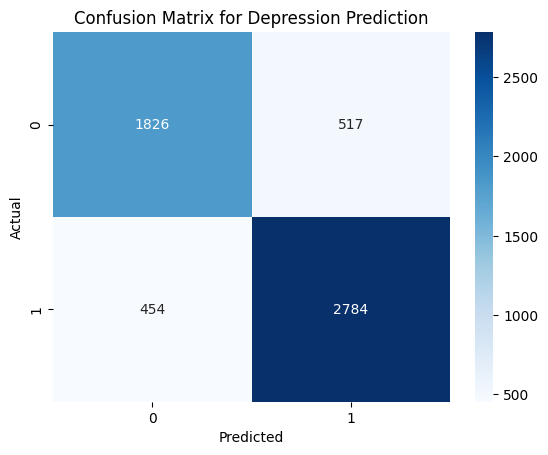

In [ ]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Depression Prediction")
plt.show()

- True Negative (TN) = 1826 → Model memprediksi "No" dan benar (tidak depresi).

- False Positive (FP) = 517 → Model memprediksi "Yes" (depresi), tetapi sebenarnya "No" → Type I Error.

- False Negative (FN) = 454 → Model memprediksi "No" (tidak depresi), tetapi sebenarnya "Yes" → Type II Error.

- True Positive (TP) = 2784 → Model memprediksi "Yes" dan benar (depresi).

## Train Model SVM

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Melatih Support Vector Machine (SVM) sebagai model kedua.

## Evaluasi Model SVM

In [ ]:
print("\nSupport Vector Machine (SVM) Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Results:
Accuracy: 0.8369

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



Confusion Matrix:
[[1826  517]
 [ 393 2845]]


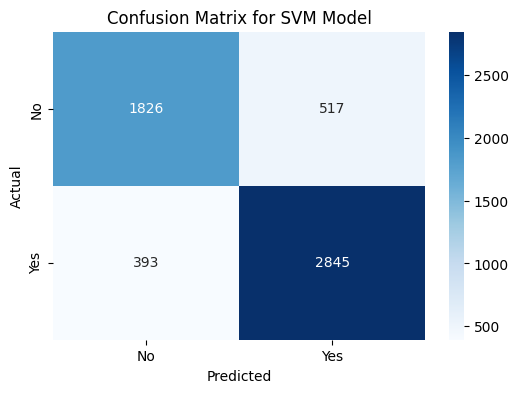

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM Model")
plt.show()

- True Negative (TN) = 1826
→ Model memprediksi "No" dan memang benar "No".

- False Positive (FP) = 517
→ Model memprediksi "Yes", tetapi seharusnya "No". (Kesalahan jenis I - Type I Error)

- False Negative (FN) = 393
→ Model memprediksi "No", tetapi seharusnya "Yes". (Kesalahan jenis II - Type II Error)

- True Positive (TP) = 2845
→ Model memprediksi "Yes" dan memang benar "Yes".

# Perbandingan Performa Model SVM dan Random Forest

 SVM lebih unggul dibandingkan Random Forest karena:

- Akurasi lebih tinggi (83.69% vs. 82.60%)

- Precision lebih tinggi (lebih sedikit false positives)

- Recall lebih tinggi (lebih sedikit false negatives)

- F1-score lebih baik (lebih seimbang dalam prediksi positif & negatif)


# Menampilkan tingkat kepentingan fitur

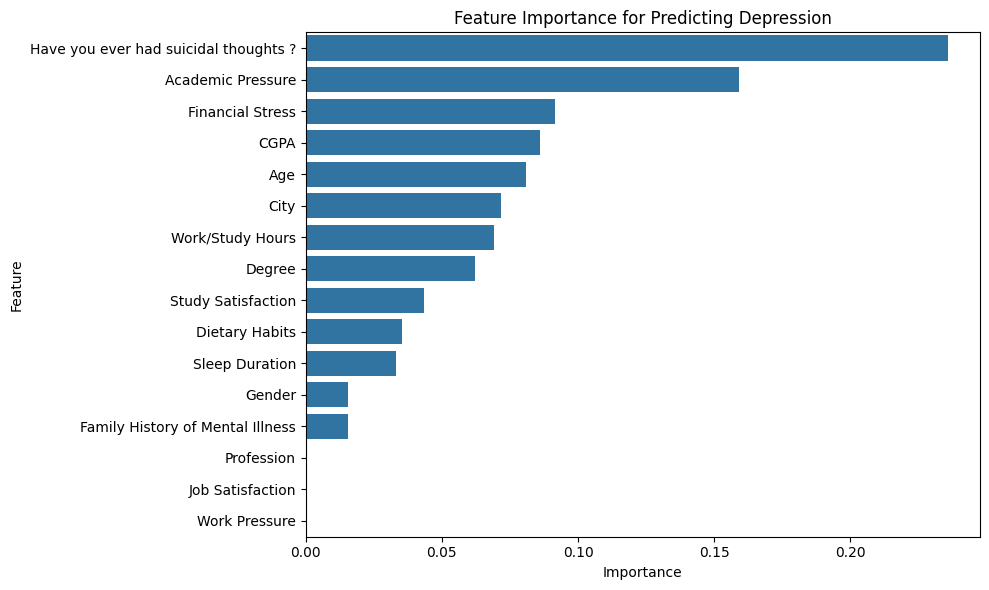

In [ ]:
importances = rf_model.feature_importances_  # Use the Random Forest model for feature importances
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importance for Predicting Depression")
plt.tight_layout()
plt.show()

- "Have you ever had suicidal thoughts?" adalah fitur yang paling penting dalam memprediksi depresi. Ini menunjukkan bahwa pertanyaan tentang pikiran untuk bunuh diri sangat relevan dalam mengidentifikasi individu yang berisiko mengalami depresi.

- "Academic Pressure" juga merupakan fitur yang sangat penting, menunjukkan bahwa tekanan akademik dapat menjadi faktor risiko yang signifikan untuk depresi.

- "Financial Stress", "CGPA", dan "Age" juga memiliki tingkat kepentingan yang cukup tinggi, menunjukkan bahwa stres keuangan, prestasi akademik, dan usia juga berperan dalam prediksi depresi.

- Fitur-fitur lain, seperti "Gender", "Family History of Mental Illness", "Profession", "Job Satisfaction", dan "Work Pressure", memiliki tingkat kepentingan yang relatif rendah. Ini menunjukkan bahwa fitur-fitur ini mungkin tidak sekuat fitur-fitur lainnya dalam memprediksi depresi.